In [15]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Context

In [60]:
titanic_filepath = "./titanic/train.csv"
titanic_data = pd.read_csv(titanic_filepath, index_col="PassengerId")

titanic_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data quality assessment

In [61]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [62]:
titanic_data.shape

(891, 11)

In [63]:
titanic_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [64]:
titanic_data.nunique()

Survived      2
Pclass        3
Name        891
Sex           2
Age          88
SibSp         7
Parch         7
Ticket      681
Fare        248
Cabin       147
Embarked      3
dtype: int64

# Missing cells

In [65]:
pd.isna(titanic_data).sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [41]:
# Drop columns with over 70% non-NaNs 
# df.dropna(thresh=int(df.shape[0] * .7), axis=1)
# Drop rows with NaN value in a specific column 
#df.dropna(axis=0, subset=['colname'])
# Fill NaN values with a mean value
#df['col'] = df['col'].fillna(df['col'].mean())

In [73]:
#additional rows for better visualizations
titanic_data['Family_Size']=titanic_data['SibSp']+titanic_data['Parch']
titanic_data['Fare_Per_Person']=titanic_data['Fare']/(titanic_data['Family_Size']+1)

def substrings_in_string(big_string, substrings):
    res = list(filter(lambda x:  x in big_string, substrings))
    return str(res)

def replace_titles(x):
    title=x['Title']
    if title in ['Don', 'Major', 'Capt', 'Jonkheer', 'Rev', 'Col']:
        return 'Mr'
    elif title in ['Countess', 'Mme']:
        return 'Mrs'
    elif title in ['Mlle', 'Ms']:
        return 'Miss'
    elif title =='Dr':
        if x['Sex']=='Male':
            return 'Mr'
        else:
            return 'Mrs'
    else:
        return title

title_list=['Mrs', 'Mr', 'Master', 'Miss', 'Major', 'Rev',
                    'Dr', 'Ms', 'Mlle','Col', 'Capt', 'Mme', 'Countess',
                    'Don', 'Jonkheer']

titanic_data['Title']=titanic_data['Name'].map(lambda x: substrings_in_string(str(x), title_list))
titanic_data['Title']=titanic_data.apply(replace_titles, axis=1)
cabin_list = ['A', 'B', 'C', 'D', 'E', 'F', 'T', 'G', 'Unknown']
titanic_data['Deck']=titanic_data['Cabin'].map(lambda x: substrings_in_string(str(x), cabin_list))

# Data exploration

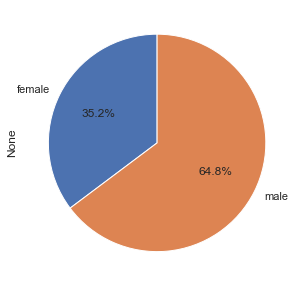

In [204]:
titanic_data.groupby('Sex').size().plot.pie(y='Sex',figsize=(5, 5),autopct='%1.1f%%', startangle=90)
plt.show()

<AxesSubplot:xlabel='None-Sex', ylabel='Pclass'>

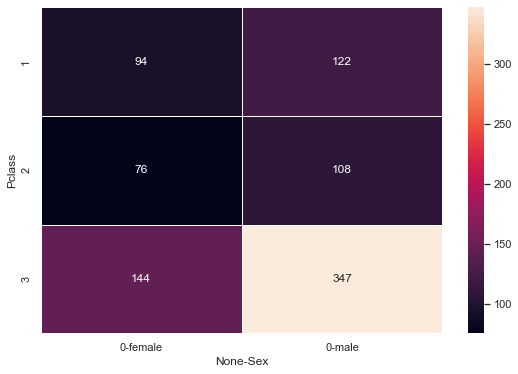

In [205]:
titanic_data_pclass = titanic_data.groupby(['Pclass', "Sex"]).size().reset_index().pivot('Pclass','Sex')
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(data=titanic_data_pclass, annot=True,fmt="d", linewidths=.5, ax=ax)

<AxesSubplot:xlabel='Age', ylabel='Density'>

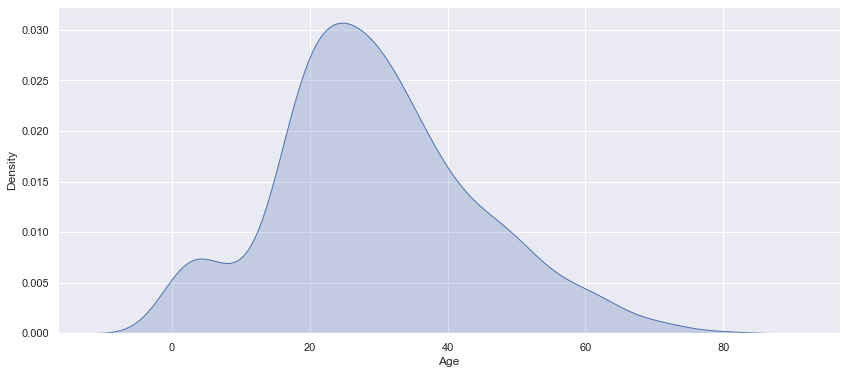

In [108]:
plt.figure(figsize=(14,6))
sns.kdeplot(data=titanic_data['Age'], shade=True)

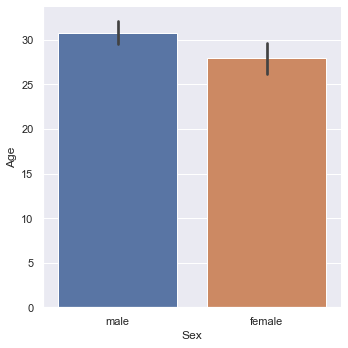

In [146]:
sns.catplot(data=titanic_data, kind="bar",x="Sex", y="Age")

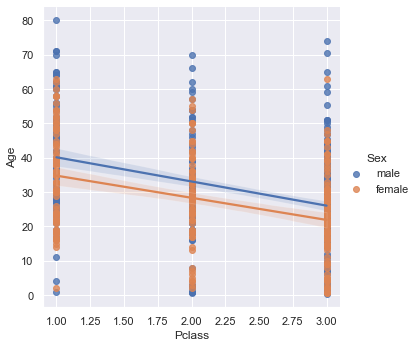

In [145]:
sns.lmplot(x="Pclass", y="Age", hue="Sex", data=titanic_data)

<AxesSubplot:xlabel='Pclass', ylabel='Fare_Per_Person'>

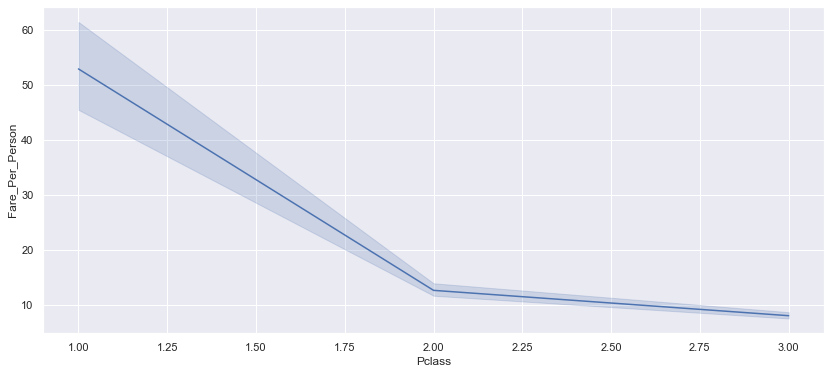

In [168]:
plt.figure(figsize=(14,6))
sns.lineplot(x= 'Pclass', y='Fare_Per_Person', data=titanic_data) 

<AxesSubplot:>

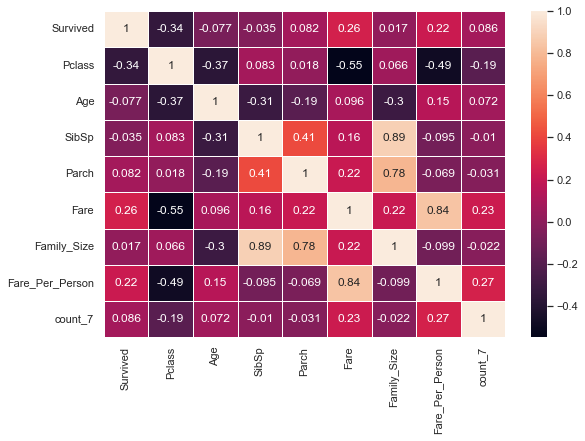

In [206]:
corrMatrix = titanic_data.corr('pearson')
corrMatrixMale = titanic_data[titanic_data['Sex'] == 'male'].corr('pearson')
corrMatrixFemale = titanic_data[titanic_data['Sex'] == 'female'].corr('pearson')

f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(data=corrMatrix, annot=True, linewidths=.5, ax=ax)

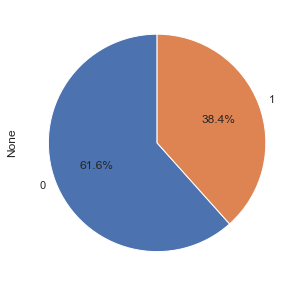

In [202]:
titanic_data.groupby('Survived').size().plot.pie(y='Survived',figsize=(5, 5),autopct='%1.1f%%', startangle=90)
plt.show()

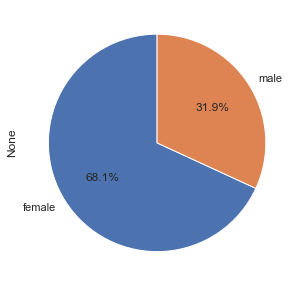

In [203]:
survived = titanic_data[titanic_data['Survived'] == 1].groupby('Sex').size()
survived.plot.pie(y='Sex',figsize=(5, 5),autopct='%1.1f%%', startangle=90)
plt.show()

<AxesSubplot:xlabel='None-Sex', ylabel='Pclass'>

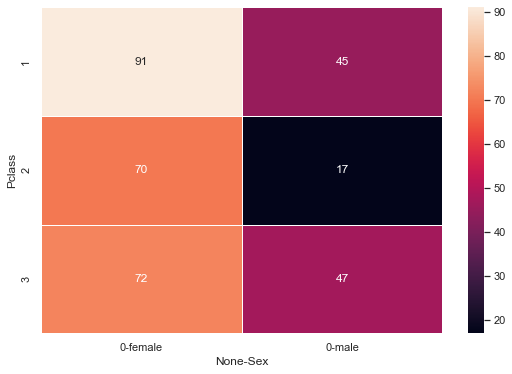

In [207]:
titanic_data_pclass_survived = titanic_data[titanic_data['Survived'] == 1] \
.groupby(['Pclass', "Sex"]).size().reset_index().pivot('Pclass','Sex')
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(data=titanic_data_pclass_survived, annot=True,fmt="d", linewidths=.5, ax=ax)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

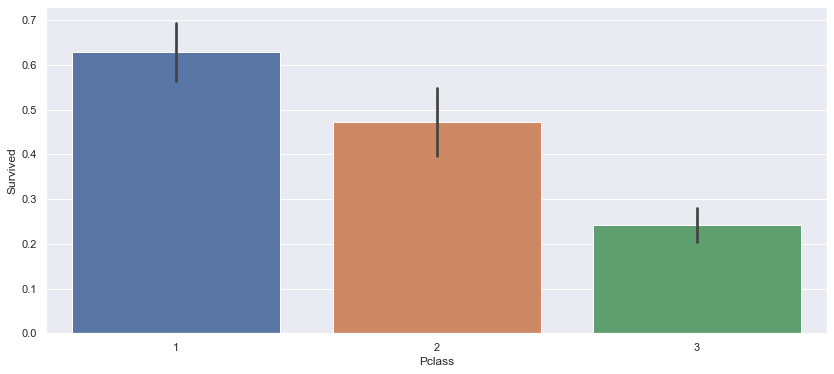

In [209]:
plt.figure(figsize=(14,6))
sns.barplot(x = 'Pclass', y ='Survived', data = titanic_data)

<AxesSubplot:xlabel='Survived', ylabel='Fare_Per_Person'>

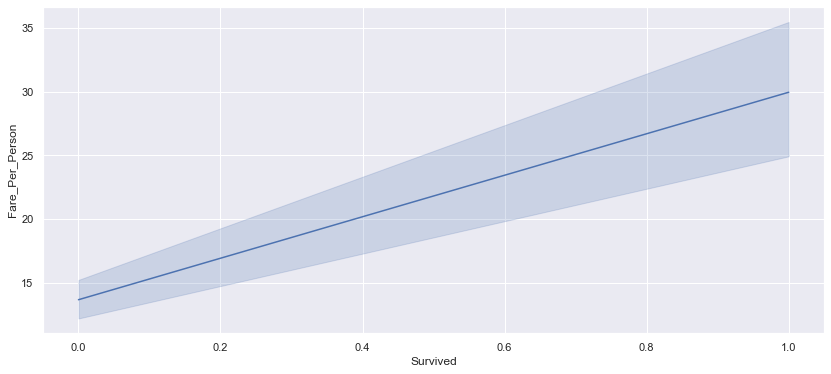

In [211]:
plt.figure(figsize=(14,6))
sns.lineplot(x= 'Survived', y='Fare_Per_Person', data=titanic_data) 

<AxesSubplot:xlabel='Age', ylabel='Survived'>

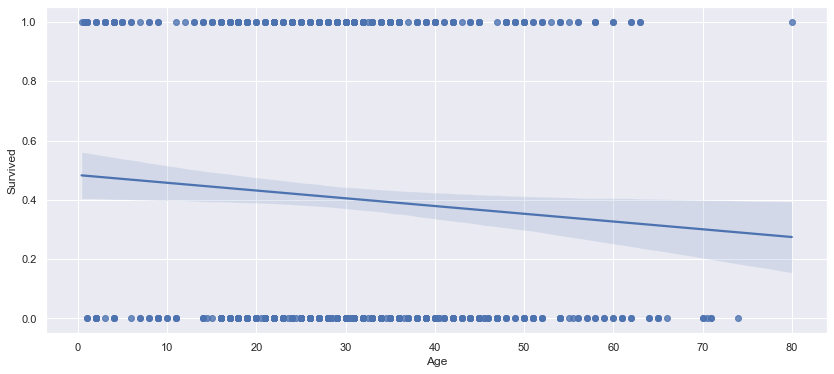

In [213]:
#sns.lineplot(x= 'Survived', y='Age', data=titanic_data)
plt.figure(figsize=(14,6))
sns.regplot(x=titanic_data['Age'], y=titanic_data['Survived'])

In [30]:
#sns.scatterplot(x=titanic_data['Survived'], y=titanic_data['Age'], hue=titanic_data['Sex'])

<Figure size 1008x432 with 0 Axes>

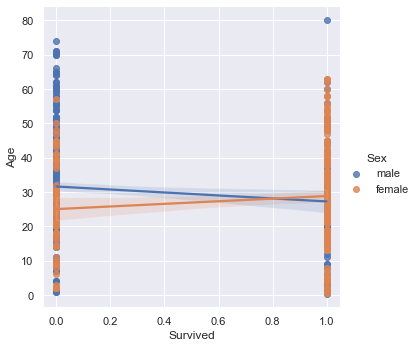

In [215]:
plt.figure(figsize=(14,6))
sns.lmplot(x="Survived", y="Age", hue="Sex", data=titanic_data)

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

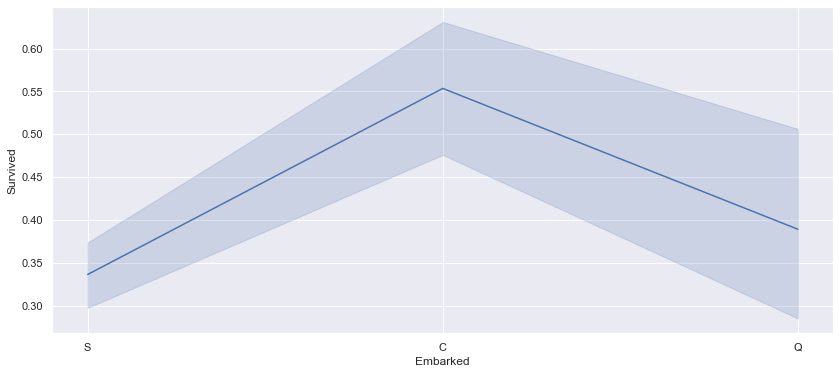

In [234]:
#Ports
#C = Cherbourg, Q = Queenstown, S = Southampton
plt.figure(figsize=(14,6))

sns.lineplot(x= 'Embarked', y='Survived', data=titanic_data) 

<Figure size 1008x432 with 0 Axes>

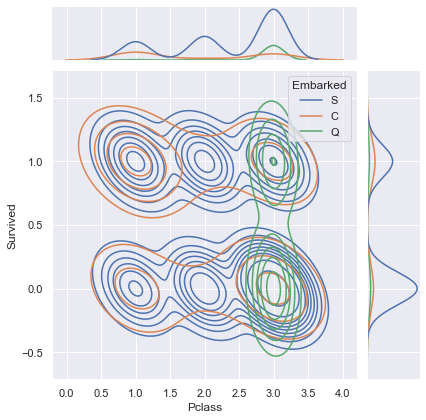

In [240]:
plt.figure(figsize=(14,6))

#sns.lineplot(x= 'Embarked', y='Pclass', data=titanic_data) 

sns.jointplot(
    data=titanic_data,
    x="Pclass", y="Survived", hue="Embarked",
    kind="kde",
)

<AxesSubplot:xlabel='Family_Size', ylabel='Survived'>

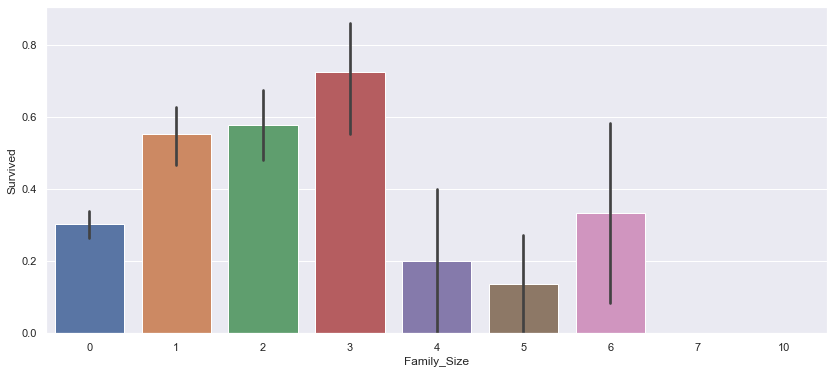

In [226]:
#Family ?
plt.figure(figsize=(14,6))

#sns.regplot(x=titanic_data['Family_Size'], y=titanic_data['Survived'])
sns.barplot(x = 'Family_Size', y ='Survived', data = titanic_data)

<AxesSubplot:xlabel='count_7', ylabel='Survived'>

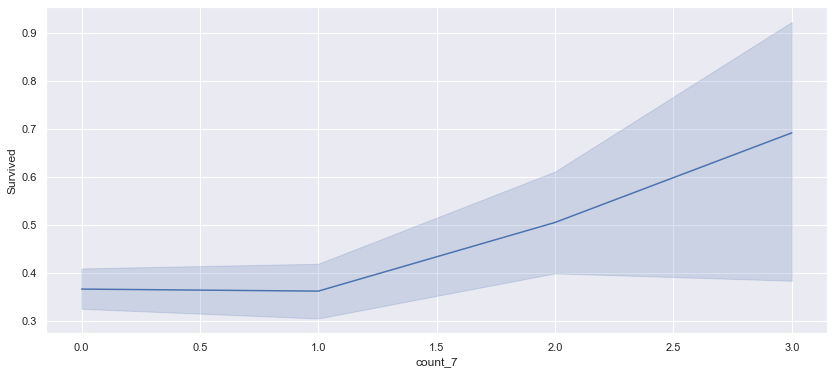

In [201]:
#Magic 
lucky_tickets = titanic_data;
lucky_tickets['count_7'] = pd.Index(lucky_tickets['Ticket']).str.count('7')
plt.figure(figsize=(14,6))
sns.lineplot(x= 'count_7', y='Survived', data=lucky_tickets) 

# Summary